In [ ]:
# imports
from sentence_transformers import SentenceTransformer, util
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [14]:
from ydata_profiling import ProfileReport

In [66]:
# just declare the embedder object once and for all
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [91]:
curated_md['unmetadata'].value_counts()

unmetadata
uncurated_metadata:no_immuno_suppressive;no_T2D;no_T1D;no_related_treatments;no_psychiatric_diseases;no_gastro_intestinal_disorder;non_celiac    900
uncurated_metadata:no_infection;no_cancer                                                                                                        250
fobt:no                                                                                                                                          121
uncurated_metadata:low_gluten_diet                                                                                                               104
uncurated_metadata:high_gluten_diet                                                                                                              103
                                                                                                                                                ... 
BASDAI:7;BASFI:3.7                                                                             

In [64]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [71]:
# function to take in two sentences and just print the cos distance between their sentence-transformer embeddings
def GetDistanceBetweenSentences(sentence, query, embedder):
    array1 = embedder.encode(sentence)
    array2 = embedder.encode(query)

    return util.cos_sim(array1, array2).numpy()

In [ ]:
# checking that is there a better matchin score when there are more, similar terms in the sentence matching 
# a given term, or less of them.

sentence1 = 'Hepatitis;cirrhosis of liver;hepatitis B virus infection'
sentence2 = 'Ascites'
sentence3 = 'cirrhosis of liver'
sentence4 = 'hepatitis B virus infection'
query = 'Hepatitis'

print(GetDistanceBetweenSentences(sentence1, query, embedder))
print(GetDistanceBetweenSentences(sentence2, query, embedder))
print(GetDistanceBetweenSentences(sentence3, query, embedder))
print(GetDistanceBetweenSentences(sentence4, query, embedder))

# Conclusion: generally, its okay to have all the terms in the sentence.

[[0.6353874]]
[[0.09957905]]
[[0.6171053]]
[[0.64557374]]


In [3]:
# read in the two metadatas as dataframe
curated_md = pd.read_csv('data/curated_meta.csv', low_memory=False)
new_md = pd.read_csv('data/new_meta.csv')

In [4]:
pd.set_option('display.max_columns', 300)

In [15]:
profile = ProfileReport(curated_md, title = 'Profiling report of curated_md')

In [18]:
profile.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 136.00it/s]


In [19]:
profile2 = ProfileReport(new_md, title = 'Profiling report of new_md')

In [20]:
profile2.to_file('report2.html')

Summarize dataset:  97%|█████████▋| 143/148 [00:00<00:00, 414.69it/s, Calculate auto correlation]/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 46.58it/s]


In [21]:
comparison_report = profile.compare(profile2)

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/ydata_profiling/compare_reports.py:191: UserWarning: The datasets being profiled have a different set of columns. Only the left side profile will be calculated.
  warnings.warn(


In [5]:
curated_md

,study_name,sample_id,age_years,age_min,age_max,age_group,age_group_ontology_term_id,biomarker,body_site,body_site_ontology_term_id,country,country_ontology_term_id,dietary_restriction,feces_phenotype_metric,feces_phenotype_value,feces_phenotype_metric_ontology_term_id,fmt_role,fmt_id,sex,sex_ontology_term_id,hla,hla_ontology_term_id,smoker,smoker_ontology_term_id,control,control_ontology_term_id,target_condition,target_condition_ontology_term_id,disease,disease_ontology_term_id,antibiotics_current_use,treatment,treatment_ontology_term_id,tumor_staging_ajcc,tumor_staging_tnm,unmetadata,westernized
0,AsnicarF_2017,MV_FEI1_t1Q14,0.246575,0.246575,0.246575,Infant,NCIT:C27956,NaN,feces,UBERON:0001988,Italy,NCIT:C16761,NaN,NaN,NaN,NaN,NaN,NaN,Female,NCIT:C16576,NaN,NaN,NaN,NaN,Study Control,NCIT:C142703,human gut microbiome,OHMI:0000020,Healthy,NCIT:C115935,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,AsnicarF_2017,MV_FEI2_t1Q14,0.246575,0.246575,0.246575,Infant,NCIT:C27956,NaN,feces,UBERON:0001988,Italy,NCIT:C16761,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,NaN,NaN,Study Control,NCIT:C142703,human gut microbiome,OHMI:0000020,Healthy,NCIT:C115935,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,AsnicarF_2017,MV_FEI3_t1Q14,0.246575,0.246575,0.246575,Infant,NCIT:C27956,NaN,feces,UBERON:0001988,Italy,NCIT:C16761,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,NaN,NaN,Study Control,NCIT:C142703,human gut microbiome,OHMI:0000020,Healthy,NCIT:C115935,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,AsnicarF_2017,MV_FEI4_t1Q14,1.000000,1.000000,1.000000,Infant,NCIT:C27956,NaN,feces,UBERON:0001988,Italy,NCIT:C16761,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,NaN,NaN,Study Control,NCIT:C142703,human gut microbiome,OHMI:0000020,Healthy,NCIT:C115935,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,AsnicarF_2017,MV_FEI4_t2Q15,1.000000,1.000000,1.000000,Infant,NCIT:C27956,NaN,feces,UBERON:0001988,Italy,NCIT:C16761,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,NaN,NaN,Study Control,NCIT:C142703,human gut microbiome,OHMI:0000020,Healthy,NCIT:C115935,NaN,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21876,ZhuF_2020,wHAXPI043592-8,37.000000,37.000000,37.000000,Adult,NCIT:C49685,Diastolic_Blood_Pressure_in_mm/Hg:81;Systolic_...,feces,UBERON:0001988,China,NCIT:C16428,NaN,NaN,NaN,NaN,NaN,NaN,Female,NCIT:C16576,NaN,NaN,Non-smoker (finding),SNOMED:8392000,Case,NCIT:C49152,Schizophrenia,NCIT:C3362,"Schizophrenia;Schizophrenia,repeated",NCIT:C3362;EUPATH:0001011,no,NaN,NaN,NaN,NaN,NaN,Yes
21877,ZhuF_2020,wHAXPI043593-9,40.000000,40.000000,40.000000,Adult,NCIT:C49685,Diastolic_Blood_Pressure_in_mm/Hg:78;Systolic_...,feces,UBERON:0001988,China,NCIT:C16428,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,Smoker (finding),SNOMED:77176002,Case,NCIT:C49152,Schizophrenia,NCIT:C3362,"Schizophrenia;Schizophrenia,repeated",NCIT:C3362;EUPATH:0001011,no,NaN,NaN,NaN,NaN,NaN,Yes
21878,ZhuF_2020,wHAXPI043594-11,25.000000,25.000000,25.000000,Adult,NCIT:C49685,Diastolic_Blood_Pressure_in_mm/Hg:83;Systolic_...,feces,UBERON:0001988,China,NCIT:C16428,NaN,NaN,NaN,NaN,NaN,NaN,Male,NCIT:C20197,NaN,NaN,Smoker (finding),SNOMED:77176002,Case,NCIT:C49152,Schizophrenia,NCIT:C3362,"Schizophrenia;Schizophrenia,repeated",NCIT:C3362;EUPATH:0001011,no,NaN,NaN,NaN,NaN,NaN,Yes
21879,ZhuF_2020,wHAXPI047830-11,39.000000,39.000000,39.000000,Adult,NCIT:C49685,Diastolic_Blood_Pressure_in_mm/Hg:80;Systolic_...,feces,UBERON:0001988,China,NCIT:C16428,NaN,NaN,NaN,NaN,NaN,NaN,Female,NCIT:C16576,NaN,NaN,Non-smoker (finding),SNOMED:8392000,Case,NCIT:C49152,Schizophrenia,NCIT:C3362,"Schizophrenia;Schizophrenia,repeated",NCIT:C3362;EUPATH:0001011,no,NaN,NaN,NaN,NaN,NaN,Yes


In [11]:
curated_md['unmetadata'].unique()

array([nan, 'travel_destination:CMR', 'travel_destination:ETH',
       'travel_destination:KEN', 'travel_destination:TZA',
       'travel_destination:RWA', 'travel_destination:IND',
       'travel_destination:LKA', 'travel_destination:NPL',
       'BASDAI:1.3;BASFI:3.2', 'BASDAI:1.3;BASFI:0',
       'BASDAI:4.9;BASFI:0.5', 'BASDAI:0.8;BASFI:0',
       'BASDAI:1.7;BASFI:0.8', 'BASDAI:0.2;BASFI:0', 'BASDAI:3.7;BASFI:0',
       'BASDAI:1.1;BASFI:1.9', 'BASDAI:0.4;BASFI:0', 'BASDAI:4.5;BASFI:0',
       'BASDAI:1.1;BASFI:0', 'BASDAI:2.7;BASFI:0', 'BASDAI:2.6;BASFI:0',
       'BASDAI:0.4;BASFI:0.2', 'BASDAI:0.8;BASFI:4', 'BASDAI:0.9;BASFI:3',
       'BASDAI:2.1;BASFI:0.6', 'BASDAI:6.6;BASFI:1.4',
       'BASDAI:1.1;BASFI:2.1', 'BASDAI:4.1;BASFI:0',
       'BASDAI:7.3;BASFI:2.1', 'BASDAI:6.8;BASFI:0.9', 'BASDAI:4;BASFI:6',
       'BASDAI:8.6;BASFI:6', 'BASDAI:2.3;BASFI:3.6',
       'BASDAI:2.2;BASFI:1.5', 'BASDAI:4.2;BASFI:3.4',
       'BASDAI:2.2;BASFI:0.8', 'BASDAI:7.1;BASFI:2',
       'BAS

In [81]:
curated_md['country'].unique()

array(['Italy', 'United States', 'United Kingdom', 'Sweden', 'Germany',
       'Fiji', 'China', 'Singapore', 'Indonesia', 'Malaysia',
       'Brunei Darussalam', 'Kazakhstan', 'Bangladesh', 'India',
       'Austria', 'Denmark', 'Luxembourg', 'France', 'Norway', 'Slovakia',
       'Hungary', 'Estonia', 'Finland', 'Iceland', 'Ireland',
       'Philippines', 'Spain', 'Netherlands', 'Mongolia', 'Cameroon',
       'Peru', 'Madagascar', 'El Salvador',
       'Tanzania, United Republic of', 'Canada', 'Liberia', 'Ghana',
       'Ethiopia', 'Japan', 'Russian Federation', 'Korea, Republic of',
       'Israel'], dtype=object)

In [77]:
curated_md.loc[21876,'biomarker']

'Diastolic_Blood_Pressure_in_mm/Hg:81;Systolic_Blood_Pressure_in_mm/Hg:120'

In [75]:
new_md.head()

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,age,infant_age,age_category,gender,country,non_westernized,sequencing_platform,DNA_extraction_kit,PMID,number_reads,number_bases,minimum_read_length,median_read_length,NCBI_accession,pregnant,lactating,curator,BMI,family,treatment,days_from_first_collection,family_role,born_method,feeding_practice,location,diet,travel_destination,visit_number,premature,birth_weight,gestational_age,antibiotics_family,disease_subtype,days_after_onset,creatine,albumine,hscrp,ESR,ast,alt,globulin,urea_nitrogen,BASDAI,BASFI,alcohol,flg_genotype,population,menopausal_status,lifestyle,body_subsite,uncurated_metadata,tnm,triglycerides,hdl,ldl,hba1c,change_in_tumor_size,RECIST,ORR,smoker,ever_smoker,dental_sample_type,history_of_periodontitis,PPD_M,PPD_B,PPD_D,PPD_L,fobt,disease_stage,disease_location,calprotectin,HBI,SCCAI,mumps,cholesterol,c_peptide,glucose,creatinine,bilubirin,prothrombin_time,wbc,rbc,hemoglobinometry,FMT_role,subcohort,fmt_id,remission,dyastolic_p,systolic_p,insulin_cat,adiponectin,glp_1,cd163,il_1,leptin,fgf_19,glutamate_decarboxylase_2_antibody,HLA,autoantibody_positive,age_seroconversion,age_T1D_diagnosis,hitchip_probe_class,previous_therapy,performance_status,toxicity_above_zero,PFS12,fasting_insulin,fasting_glucose,protein_intake,stec_count,shigatoxin_2_elisa,stool_texture,anti_PD_1,ajcc,smoke,bristol_score,hsCRP,LDL,mgs_richness,ferm_milk_prod_consumer,inr,birth_control_pil,c_section_type,hla_drb12,hla_dqa12,hla_dqa11,hla_drb11,zigosity,brinkman_index,alcohol_numeric,breastfeeding_duration,formula_first_day,ALT,eGFR
0,HanniganGD_2017,MG100208,HanniganGD_2017_A29,stool,no,adenoma,adenoma,45.0,NaN,adult,female,CAN,no,IlluminaHiSeq,MoBio,30459201,6133350,763336051,75,126,SRR5665080,NaN,NaN,Paolo_Manghi,31.626276,NaN,NaN,NaN,NaN,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HanniganGD_2017,MG100207,HanniganGD_2017_A28,stool,no,adenoma,adenoma,50.0,NaN,adult,male,CAN,no,IlluminaHiSeq,MoBio,30459201,9320348,1161633690,75,126,SRR5665075,NaN,NaN,Paolo_Manghi,31.673469,NaN,NaN,NaN,NaN,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HanniganGD_2017,MG100206,HanniganGD_2017_A27,stool,no,adenoma,adenoma,68.0,NaN,senior,male,CAN,no,IlluminaHiSeq,MoBio,30459201,6342570,787897159,75,126,SRR5665074,NaN,NaN,Paolo_Manghi,25.216253,NaN,NaN,NaN,NaN,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HanniganGD_2017,MG100205,HanniganGD_2017_A26,stool,no,adenoma,adenoma,80.0,NaN,senior,female,CAN,no,IlluminaHiSeq,MoBio,30459201,12551662,1562374319,75,126,SRR5665073,NaN,NaN,Paolo_Manghi,28.719723,NaN,NaN,NaN,NaN,NaN,NaN,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### find which columns in new metadata are close to columns in curated

In [23]:
# declare the embedder object, which will be used to get embeddings of sentences (column values or entries of a column)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [24]:
# encode the two sets of column_names using the embedder
encoding_columns_curated = embedder.encode(curated_md.columns)
encoding_columns_new = embedder.encode(new_md.columns)

In [28]:
encoding_all = np.vstack([encoding_columns_curated, encoding_columns_new])

In [29]:
import umap

In [30]:
reducer = umap.UMAP()
embeddings_2d = reducer.fit_transform(encoding_all)

/Users/shashankkatiyar/miniconda3/envs/gsoc/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [50]:
temp_df = pd.DataFrame(data = {
    'x' : embeddings_2d[:,0],
    'y' : embeddings_2d[:,1],
    'cat' : ['curated']*encoding_columns_curated.shape[0] + ['new']*encoding_columns_new.shape[0],
    'col': list(curated_md.columns) + list(new_md.columns)
})

In [51]:
temp_df.head()

,x,y,cat,col
0,6.926106,9.672873,curated,study_name
1,6.696619,9.500680,curated,sample_id
2,3.452151,7.751750,curated,age_years
3,3.266342,8.017783,curated,age_min
4,3.402054,7.854575,curated,age_max


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.scatterplot(temp_df, x = 'x', y = 'y', hue = 'cat')
# Add text annotations for each point
for i in range(len(temp_df)):
    plt.text(temp_df['x'][i], temp_df['y'][i], temp_df['col'][i], fontsize=6, ha='right')
plt.savefig('plot.pdf')
plt.clf()

In [31]:
embeddings_2d

array([[ 6.926106 ,  9.672873 ],
       [ 6.696619 ,  9.50068  ],
       [ 3.4521506,  7.75175  ],
       [ 3.266342 ,  8.017783 ],
       [ 3.402054 ,  7.8545747],
       [ 3.510588 ,  8.098396 ],
       [ 5.0213304,  9.782852 ],
       [ 6.6356463,  6.397832 ],
       [ 5.224983 ,  9.07507  ],
       [ 5.477805 ,  9.956145 ],
       [ 4.5363345,  5.080658 ],
       [ 5.177696 ,  9.99945  ],
       [ 6.035981 ,  7.7994123],
       [ 5.87903  ,  8.630977 ],
       [ 5.7896667,  8.361292 ],
       [ 5.677509 ,  9.247521 ],
       [ 7.3954873,  8.481698 ],
       [ 7.288262 ,  8.862672 ],
       [ 4.7979946,  5.8658876],
       [ 5.3693943,  9.9008665],
       [ 9.301098 ,  5.9540915],
       [ 5.0690136, 10.058134 ],
       [ 5.991455 ,  4.8244367],
       [ 5.132762 , 10.198279 ],
       [ 5.485708 ,  5.455909 ],
       [ 5.204153 , 10.179313 ],
       [ 6.5151553,  9.51528  ],
       [ 5.3555193,  9.971129 ],
       [ 5.0310583,  6.3921304],
       [ 5.3084016,  9.752299 ],
       [ 5

In [ ]:
# now find the similarity between each pair of columns
cos_sim = util.cos_sim(encoding_columns_curated, encoding_columns_new).numpy() # convert to numpy so that its easier to play around with the data

In [44]:
# convert cos_sim into a df
cos_sim_df = pd.DataFrame(cos_sim, columns=new_md.columns, index=curated_md.columns)
cos_sim_df.head()

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,age,infant_age,age_category,...,hla_dqa12,hla_dqa11,hla_drb11,zigosity,brinkman_index,alcohol_numeric,breastfeeding_duration,formula_first_day,ALT,eGFR
study_name,1.000000,0.347160,0.397608,0.221160,0.187657,0.687969,0.235669,0.160212,0.231586,0.311439,...,0.233462,0.249228,0.331755,0.245277,0.267076,0.257001,0.159335,0.164080,0.156444,0.247201
sample_id,0.347160,1.000000,0.597291,0.252397,0.110503,0.242132,0.150035,0.161166,0.208563,0.277751,...,0.268515,0.277976,0.290121,0.124724,0.235086,0.248946,0.018568,0.187231,0.103806,0.035435
age_years,0.276576,0.221174,0.248316,0.187858,0.092056,0.200808,0.206752,0.792231,0.639830,0.648421,...,0.174605,0.180490,0.230272,0.191856,0.180992,0.258295,0.296681,0.205880,0.123578,0.115886
age_min,0.274842,0.243055,0.242886,0.196458,0.040628,0.157244,0.129523,0.695907,0.632453,0.626132,...,0.284264,0.292213,0.345200,0.176473,0.223499,0.323045,0.239364,0.195475,0.238300,0.121215
age_max,0.284082,0.262482,0.267079,0.216502,0.101852,0.188837,0.154617,0.667522,0.591027,0.635138,...,0.335966,0.336671,0.368175,0.191392,0.240415,0.334548,0.261022,0.186401,0.227394,0.137523


<Axes: >

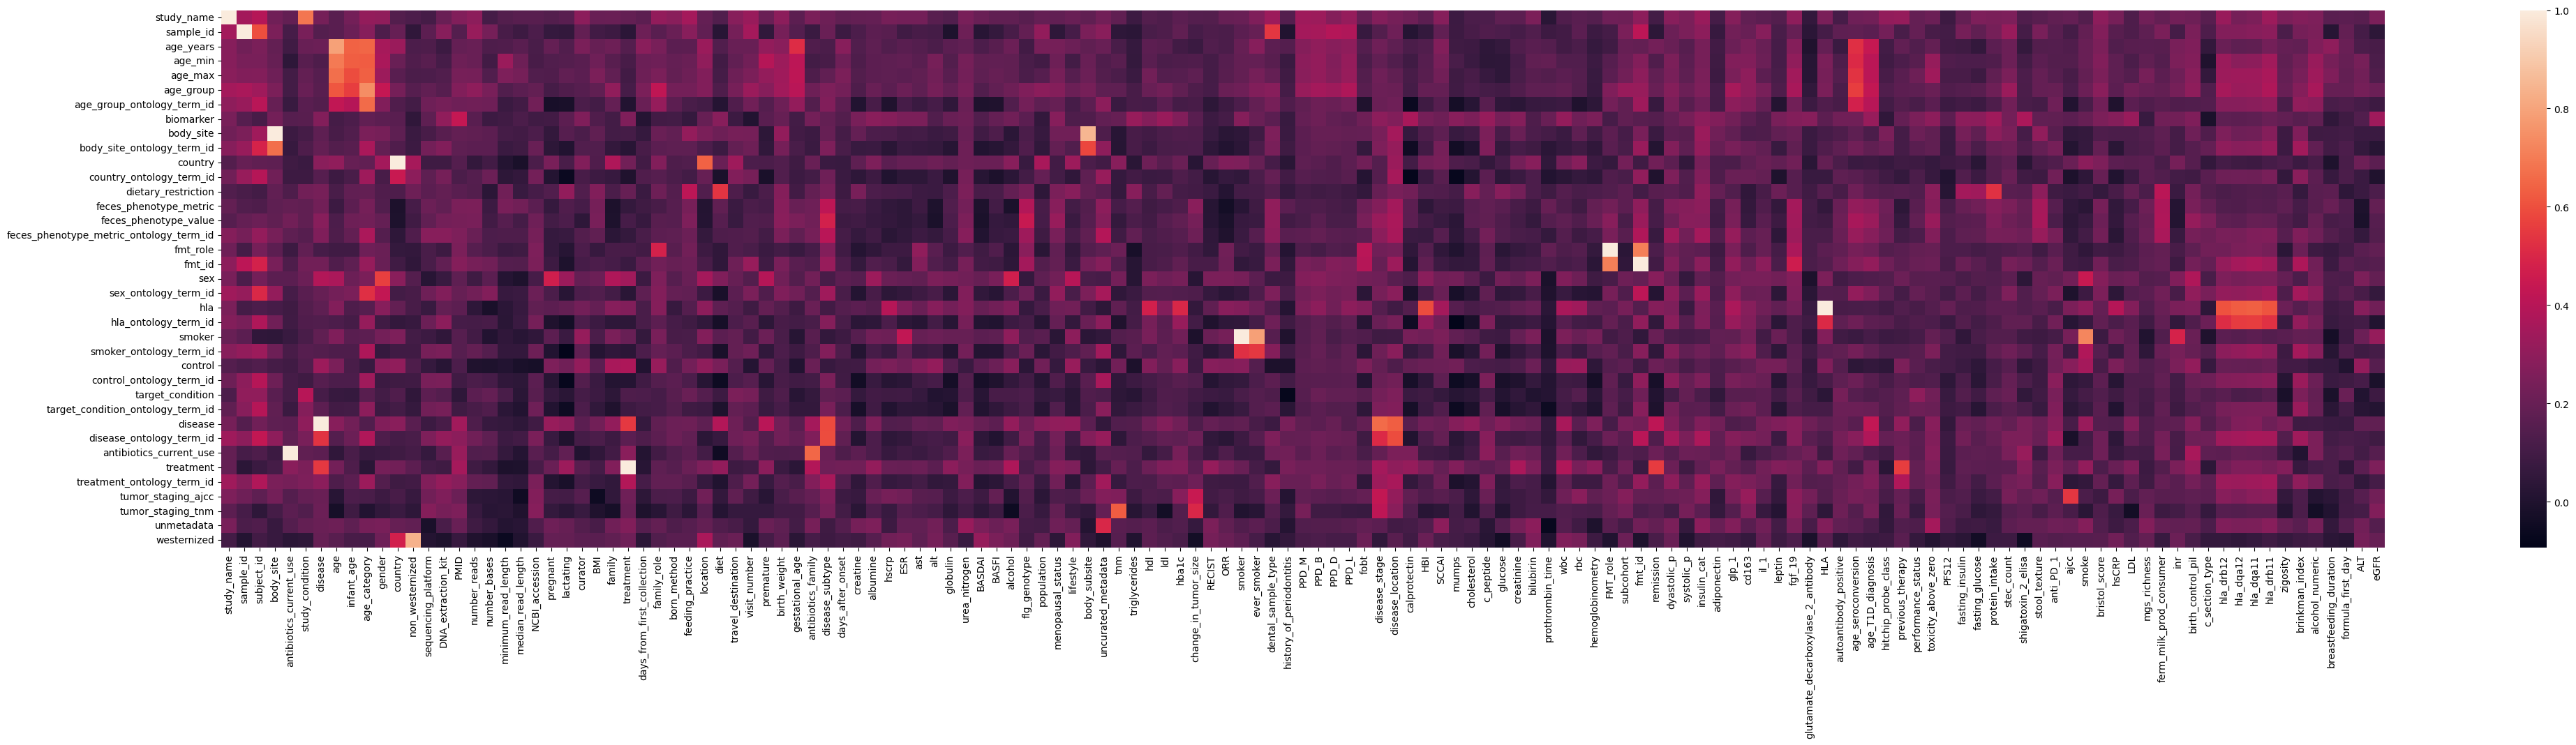

In [45]:
# lets plot the similarity values, just to get an intuition of how the values look like
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
sns.heatmap(cos_sim_df)

As we can see from the heatmap, there are multiple columns which match one-to-one between the new and the curated metadatas. For a start, we can just extract these columns from new and they will be appended to the curated metadata. For the other columns of curated metadata, we will have to see which columns from new match the best.

In [54]:
# get columns which are present in both, curated and new metadata
intersection_columns = curated_md.columns[curated_md.columns.isin(new_md.columns)]

In [ ]:
# lets remove the intersection columns from both dataframes, and then recompute which columns from new_md match the best to remaining 
# columns in curated_md
curated_md_remaining_cols = [col for col in curated_md.columns if col not in intersection_columns]
new_md_remaining_cols = [col for col in new_md.columns if col not in intersection_columns]

In [64]:
# now find the best col from new_md_remaining_cols which matches each col from curated_md_remaining_cols
for curated_col in curated_md_remaining_cols:
    print(curated_col, cos_sim_df.columns[cos_sim_df.loc[curated_col, :].argmax()], cos_sim_df.loc[curated_col, :].max())

age_years age 0.79223084
age_min age 0.695907
age_max age 0.6675224
age_group age_category 0.7431414
age_group_ontology_term_id age_category 0.66114676
biomarker PMID 0.4328997
body_site_ontology_term_id body_site 0.6705602
country_ontology_term_id country 0.4481796
dietary_restriction diet 0.5376606
feces_phenotype_metric disease_subtype 0.4155871
feces_phenotype_value disease_subtype 0.4779166
feces_phenotype_metric_ontology_term_id disease_subtype 0.40508527
fmt_role FMT_role 1.0000002
sex gender 0.56082547
sex_ontology_term_id age_category 0.52552235
hla HLA 1.0000002
hla_ontology_term_id hla_dqa11 0.5592524
smoker_ontology_term_id ever_smoker 0.54502827
control treatment 0.3755003
control_ontology_term_id subject_id 0.39645123
target_condition study_condition 0.4018426
target_condition_ontology_term_id subject_id 0.3965265
disease_ontology_term_id disease_subtype 0.5927948
treatment_ontology_term_id treatment 0.3886761
tumor_staging_ajcc ajcc 0.54115784
tumor_staging_tnm tnm 0.627

A corner case, matching which could be very bad, is westernized and non_westernized. Even though they have high cos similarity, they shouldn't be merged into one (atleast not before any processing).

In [11]:
new['age']

0      45.0
1      50.0
2      68.0
3      80.0
4      63.0
       ... 
702     NaN
703     NaN
704     NaN
705     NaN
706     NaN
Name: age, Length: 707, dtype: float64

In [10]:
curated['age_years']

0         0.246575
1         0.246575
2         0.246575
3         1.000000
4         1.000000
           ...    
21876    37.000000
21877    40.000000
21878    25.000000
21879    39.000000
21880    38.000000
Name: age_years, Length: 21881, dtype: float64

In [8]:
curated['body_site'].value_counts()

body_site
feces                                      19400
feces;rectum                                 923
skin epidermis                               373
oral cavity                                  220
oral cavity;dorsum of tongue                 198
oral cavity;subgingival dental plaque        168
oral cavity;supragingival dental plaque      127
oral cavity;buccal mucosa                    119
nasal cavity;anterior naris                   93
vagina;posterior fornix of vagina             62
skin epidermis;elbow                          41
skin epidermis;retroauricular region          27
skin epidermis;right ear                      26
vagina;vagina orifice                         22
skin epidermis;left ear                       22
skin epidermis;chest                          15
vagina                                        10
milk                                           8
oral cavity;throat                             7
oral cavity;palatine tonsil                    6
oral cavit